# milner video proj

In [1]:
# Import all the things.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Config
XLABEL = 'Time (s)'
YLABEL = 'Speed (m/s)'

## Helper funcs

In [3]:
def get_crests(df, wave_filter=None, use_troughs=False):
    if wave_filter is not None:
        df = wave_filter.apply_x_filter(df)
    points = df[YLABEL].tolist() # Store a list of the points from the sample.
    crests = []
    ends_of_cycles = []

    for index, point in enumerate(points): # Go through each point one by one
        try:
            if point > 0 and points[index+1] < 0:
                ends_of_cycles.append(index)
        except IndexError:
            pass


    raw_cycles = [sl.tolist() for sl in np.split(points, ends_of_cycles)][:-1]
    cycles = [x for x in raw_cycles if x != []]
    for cycle in cycles:
        crests.append(max(cycle) if use_troughs is False else min(cycle))
    return crests

In [4]:
def big_scary_plot(smpls):
    fig = plt.figure(figsize=[18,6])

    for frame in smpls.keys():
        fr = smpls[frame]
        plt.plot(fr[XLABEL], fr[YLABEL])

    plt.legend(smpls.keys())
    plt.grid(visible=True)
    plt.show()

In [5]:
def plot_trial_dataframe(df, name=None):
    df.plot(
        x=XLABEL,
        y=YLABEL,
        figsize=(24,6),
        grid=True,
        title=name,
        xlabel=XLABEL,
        ylabel=YLABEL
    )

In [6]:
def filter_points(crests_list):
    abs_cr = np.absolute(crests_list)
    filtered_cr = sorted(abs_cr, reverse=True)
    return filtered_cr[0:5]

In [7]:
class WaveFilter():
    def __init__(self, x_min=0, x_max=4096, y_min=-4096, y_max=4096):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        
    def apply_x_filter(self, df):
        xcols = [XLABEL]
        ycols = [YLABEL]

        df.drop(df[df[XLABEL] < self.x_min].index, inplace=True)
        df.drop(df[df[XLABEL] > self.x_max].index, inplace=True)
        
        plot_trial_dataframe(df)
        return df

## 15

In [8]:
FIFTEEN_DEG_SAMPLES = {}

for trial in range(1, 11):
    trial_id = f"15-t{trial}"
    xls_name = f"{trial_id}.xls"
    df = pd.read_excel(xls_name)
    FIFTEEN_DEG_SAMPLES[trial_id] = df

In [9]:
# for item in FIFTEEN_DEG_SAMPLES.keys():
    # display(FIFTEEN_DEG_SAMPLES[item])

In [10]:
# big_scary_plot(FIFTEEN_DEG_SAMPLES)

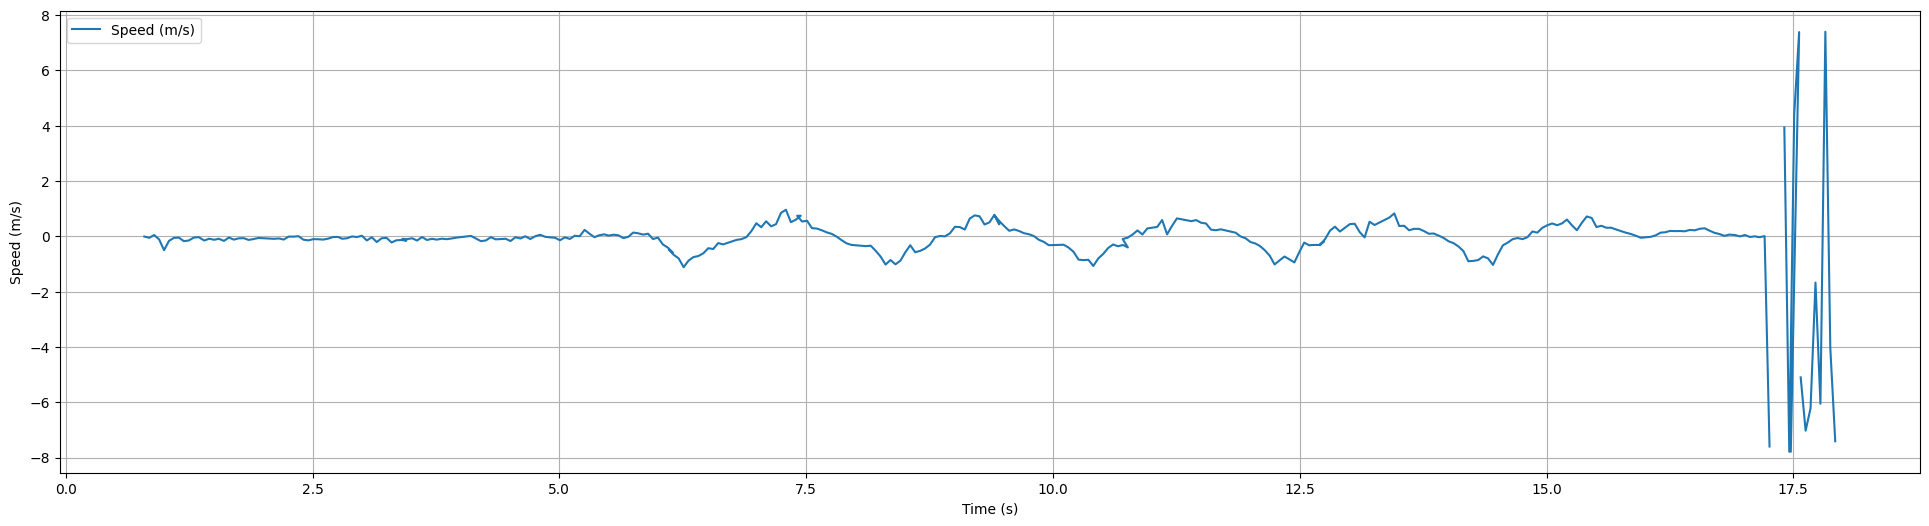

In [11]:
plot_trial_dataframe(FIFTEEN_DEG_SAMPLES['15-t10'])

In [12]:
WFS = {
    '15-t1': WaveFilter(x_min=5, x_max=15),
    '15-t2': WaveFilter(x_min=7.5, x_max=17.5),
    '15-t3': WaveFilter(x_min=6.5, x_max=17.5),
    '15-t4': WaveFilter(x_min=7.5, x_max=17.5),
    '15-t5': WaveFilter(x_min=7.5, x_max=17.5),
    '15-t6': WaveFilter(x_min=5, x_max=20),
    '15-t7': WaveFilter(x_min=6, x_max=16.5),
    '15-t8': WaveFilter(x_min=4, x_max=15),
    '15-t9': WaveFilter(x_min=5, x_max=15),
    '15-t10': WaveFilter(x_min=6, x_max=15.5),
}

15-t1
[0.16400982200123648, 0.7180028662572036, 0.9263253295487694, 0.8762160682950015, 1.0224392642930424, 0.919278204133096]
[0.0037595367041953764, -0.894684787174822, -1.2392491422123308, -1.13893138900655, -0.9634482165829317, -0.8067011731551377]
trial avg v: 0.9505276440658885
~~~~~~
15-t2
[-0.1276913468774099, 1.2810371124178732, 0.9276806468587862, 0.9335910778474599, 0.9024208787261534, 0.8097741300445915]
[-0.9598623844370335, -0.030372820097812614, -0.6688869886302573, -0.8504112558757004, -0.9213906859470766, -0.8161787565884726]
trial avg v: 0.9071233917373405
~~~~~~
15-t3
[0.9134750034565053, 0.8469793843012008, 0.9314221514686749, 0.8906633364140837, 0.9283390034373573]
[-1.2013256868291267, -1.043259747963492, -0.9894721982923071, -1.1848498768547522, -1.0800905181144183]
trial avg v: 1.0009876907131918
~~~~~~
15-t4
[-0.08555105014296682, 1.0551913174802663, 1.1838161393372282, 1.155302418535964, 0.9052295202879912, 0.11404128734812558, 0.8557052657244291]
[-0.59307128

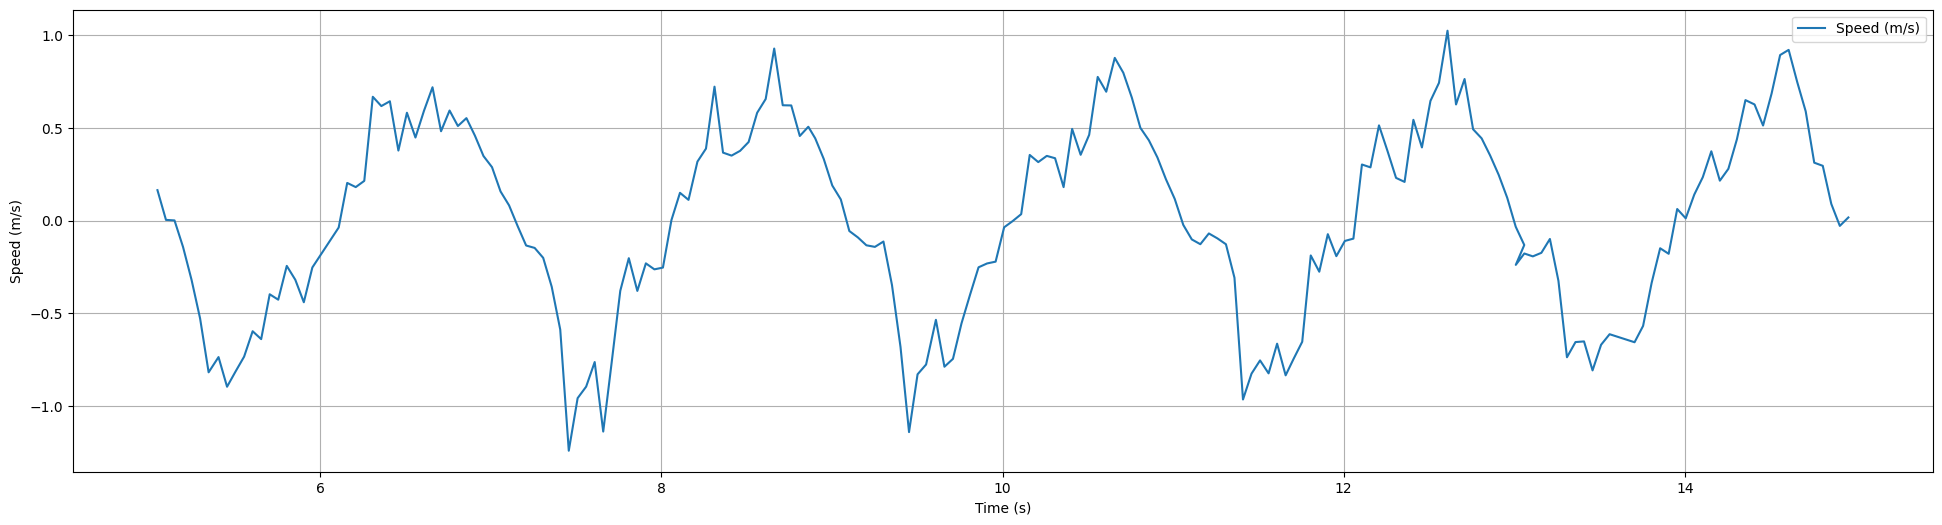

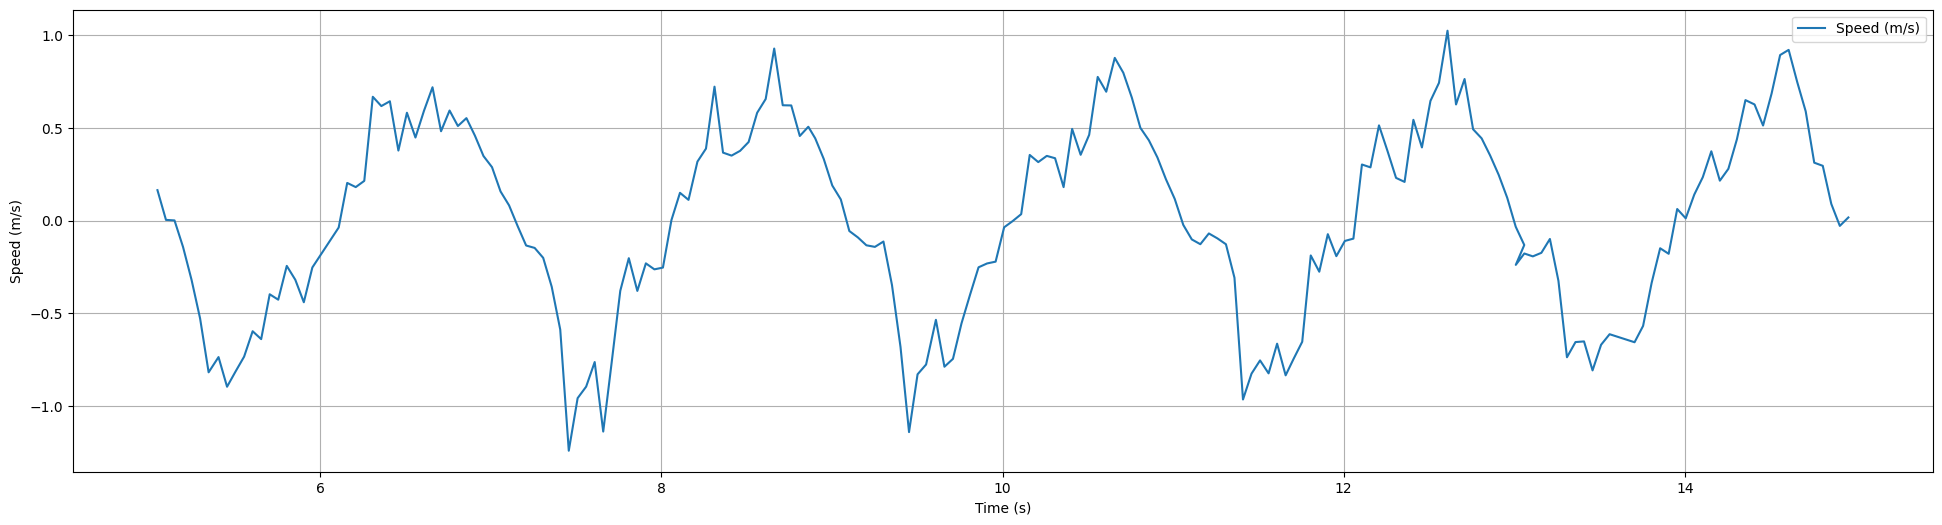

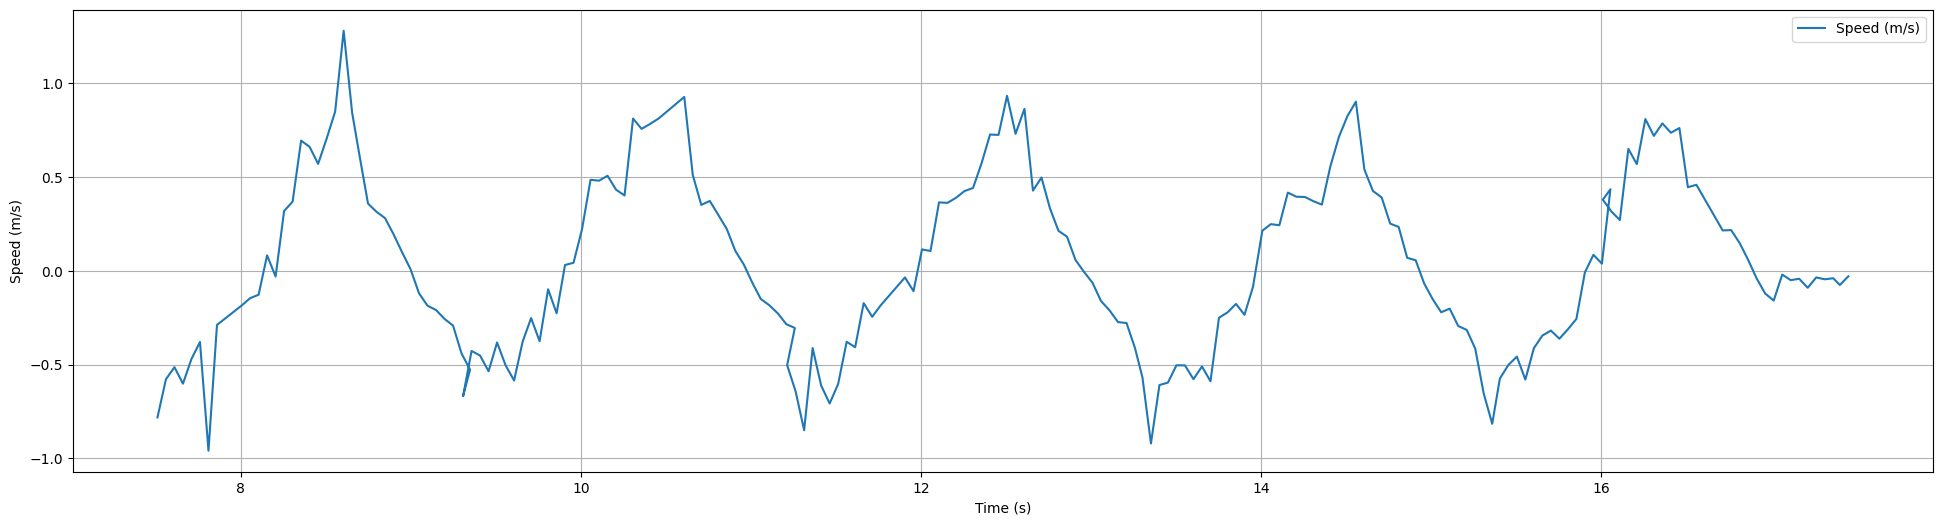

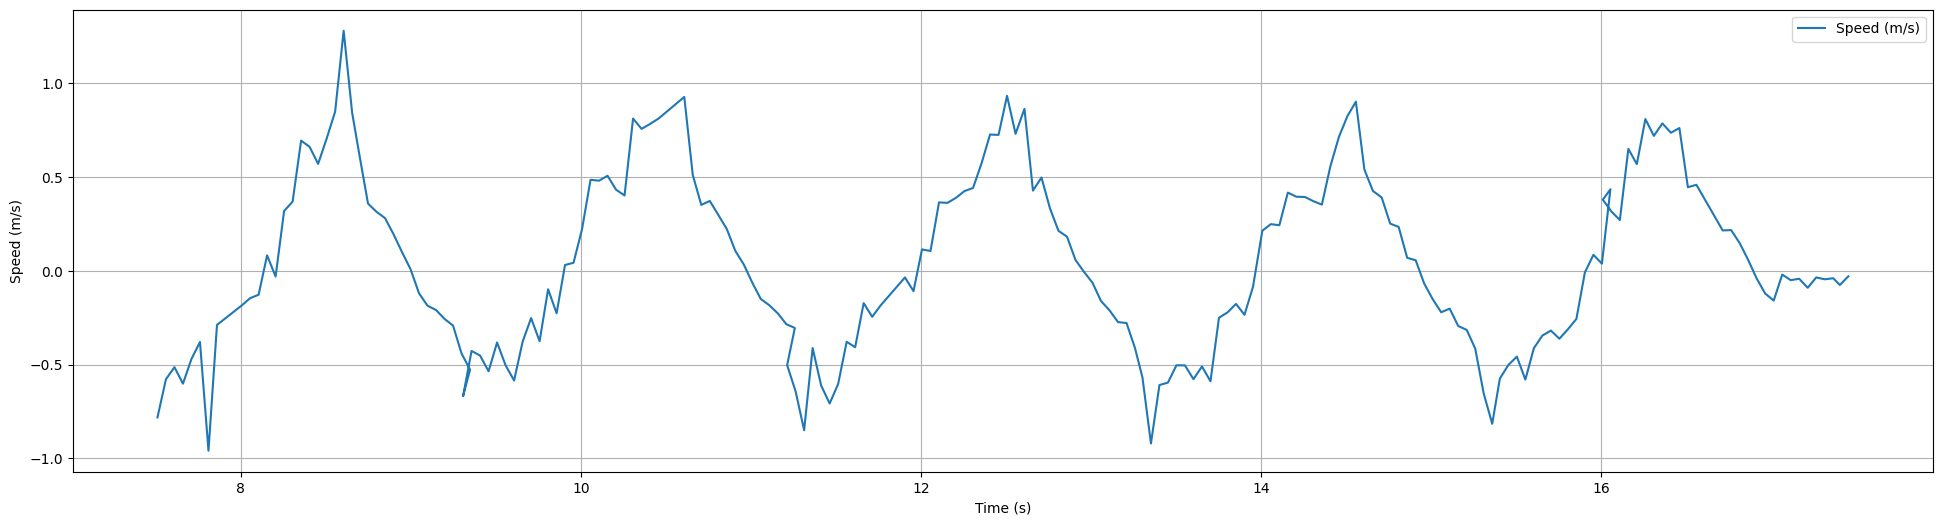

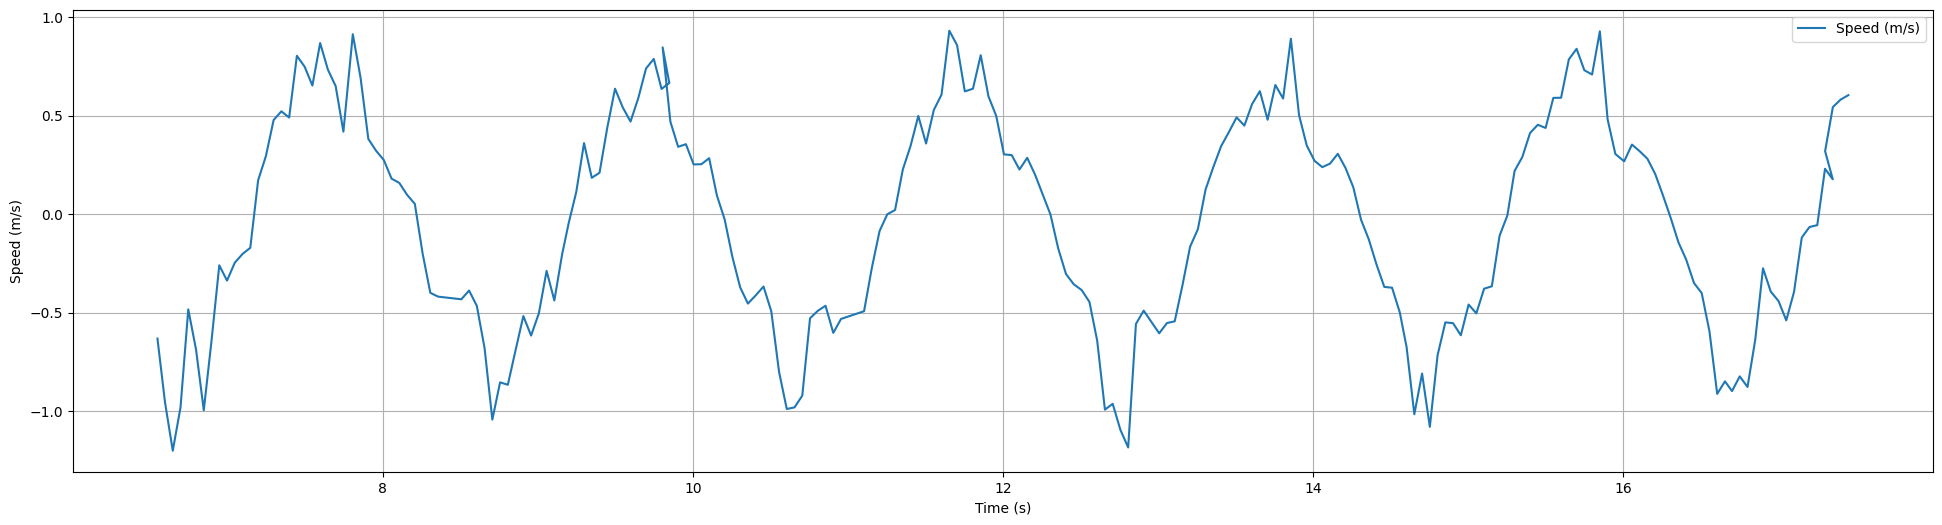

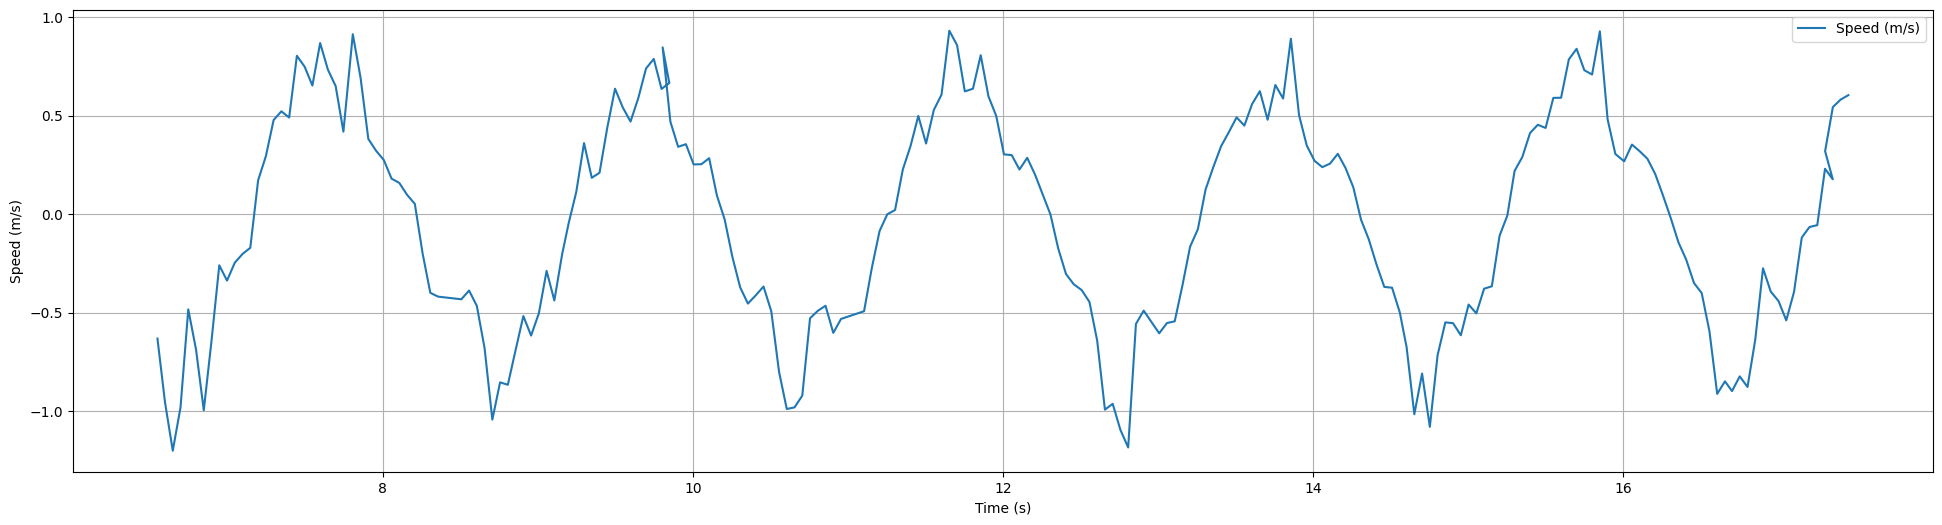

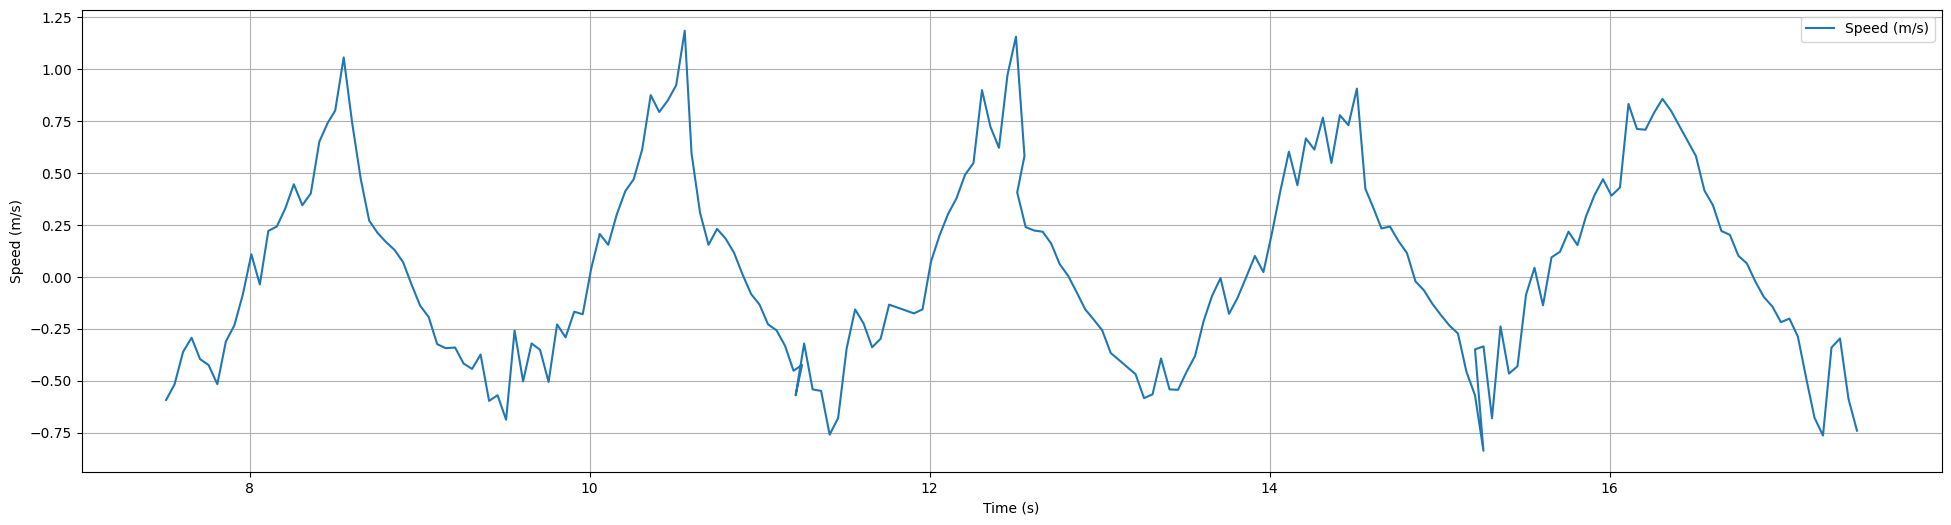

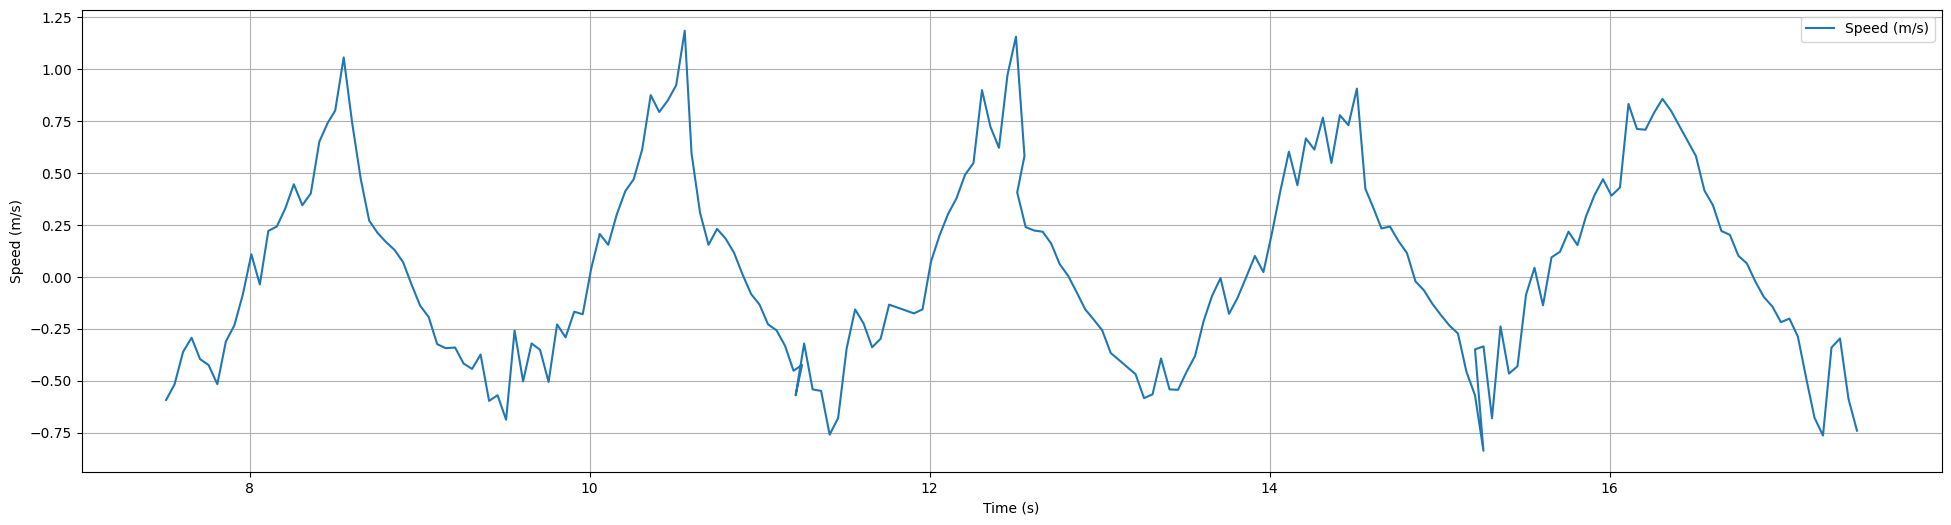

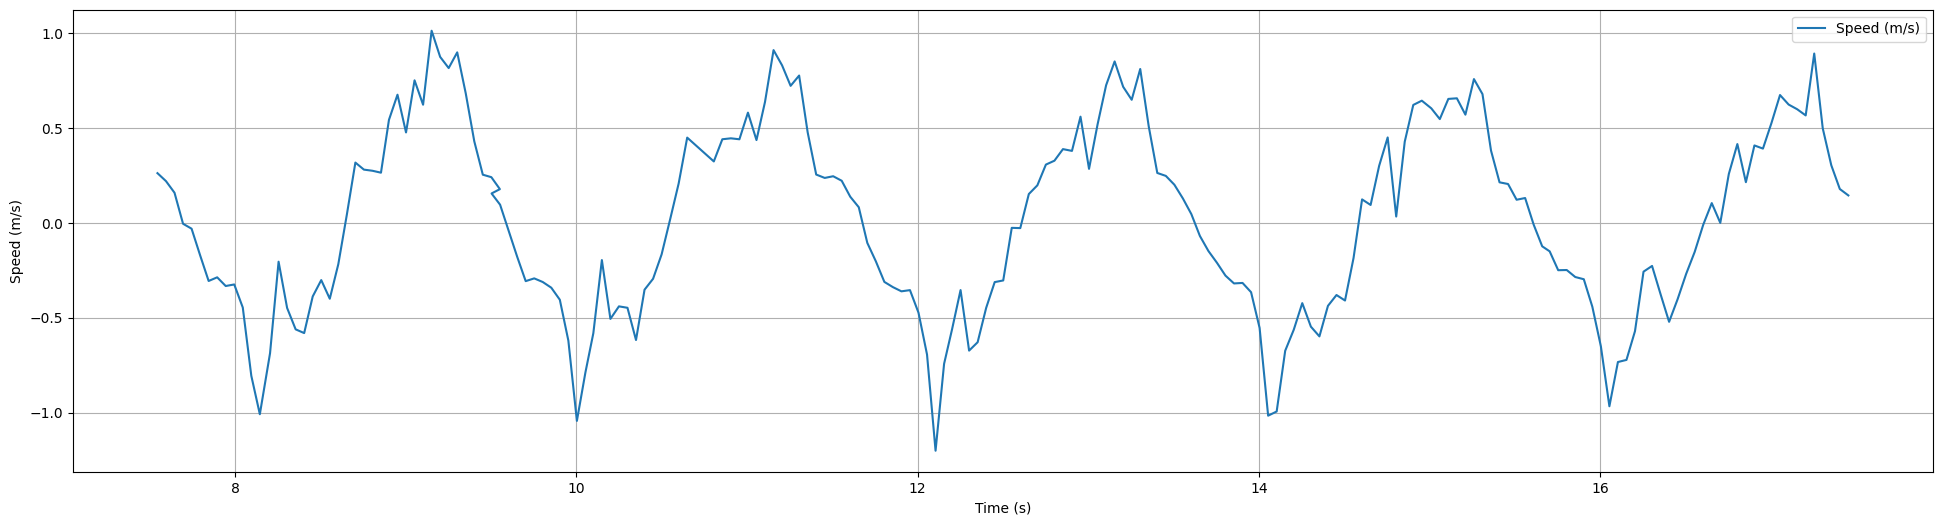

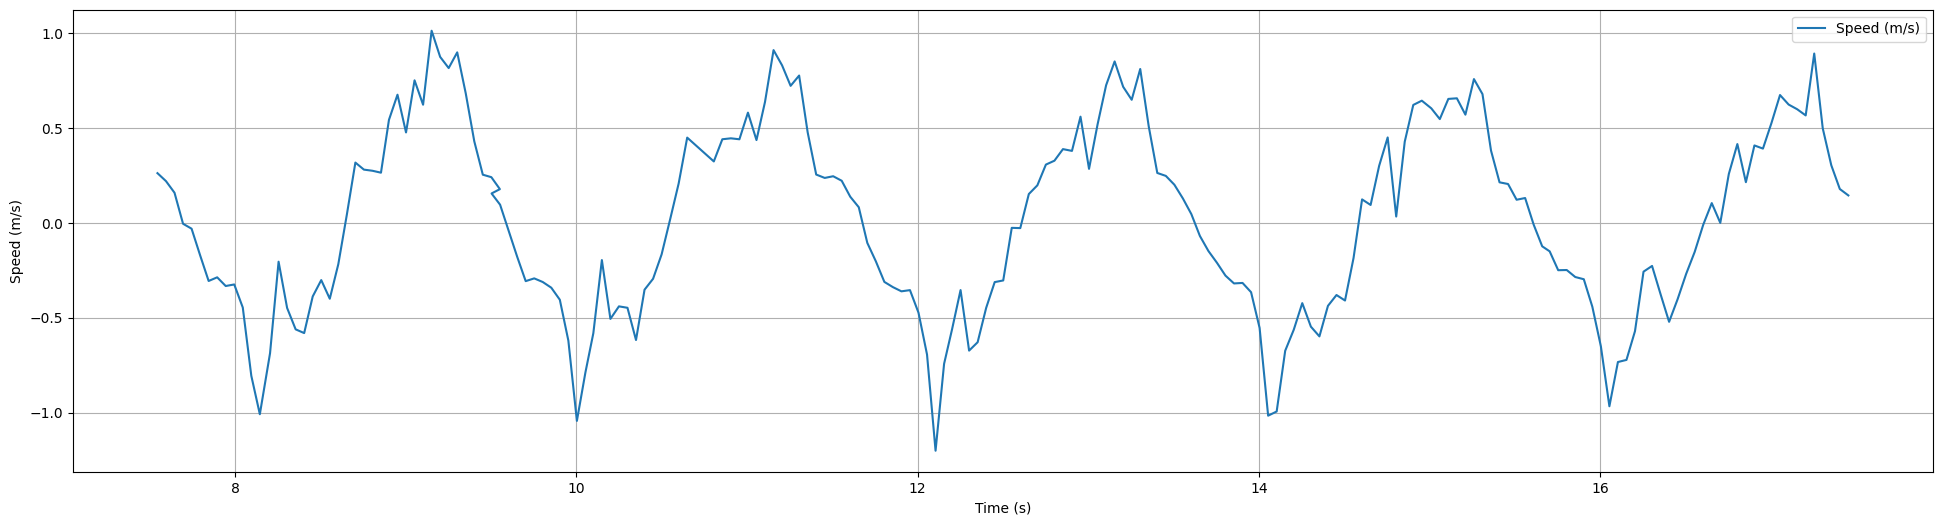

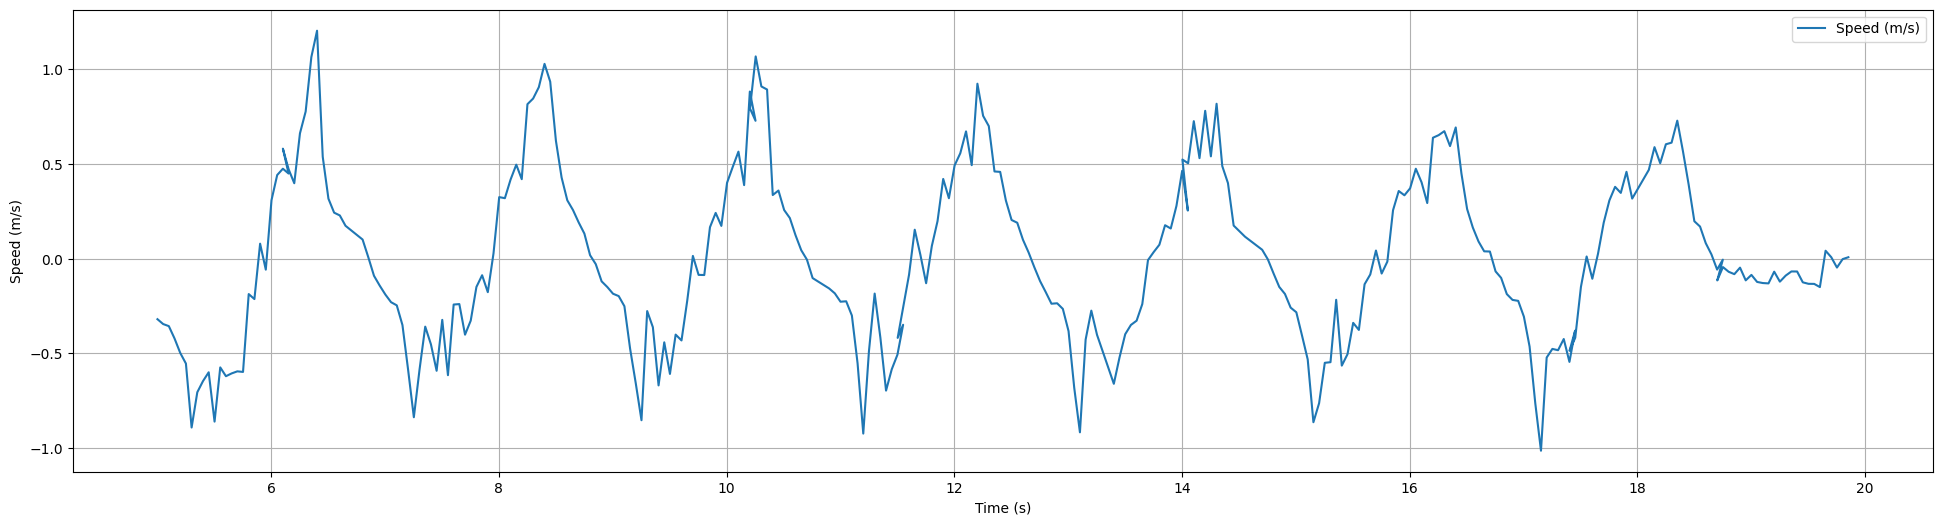

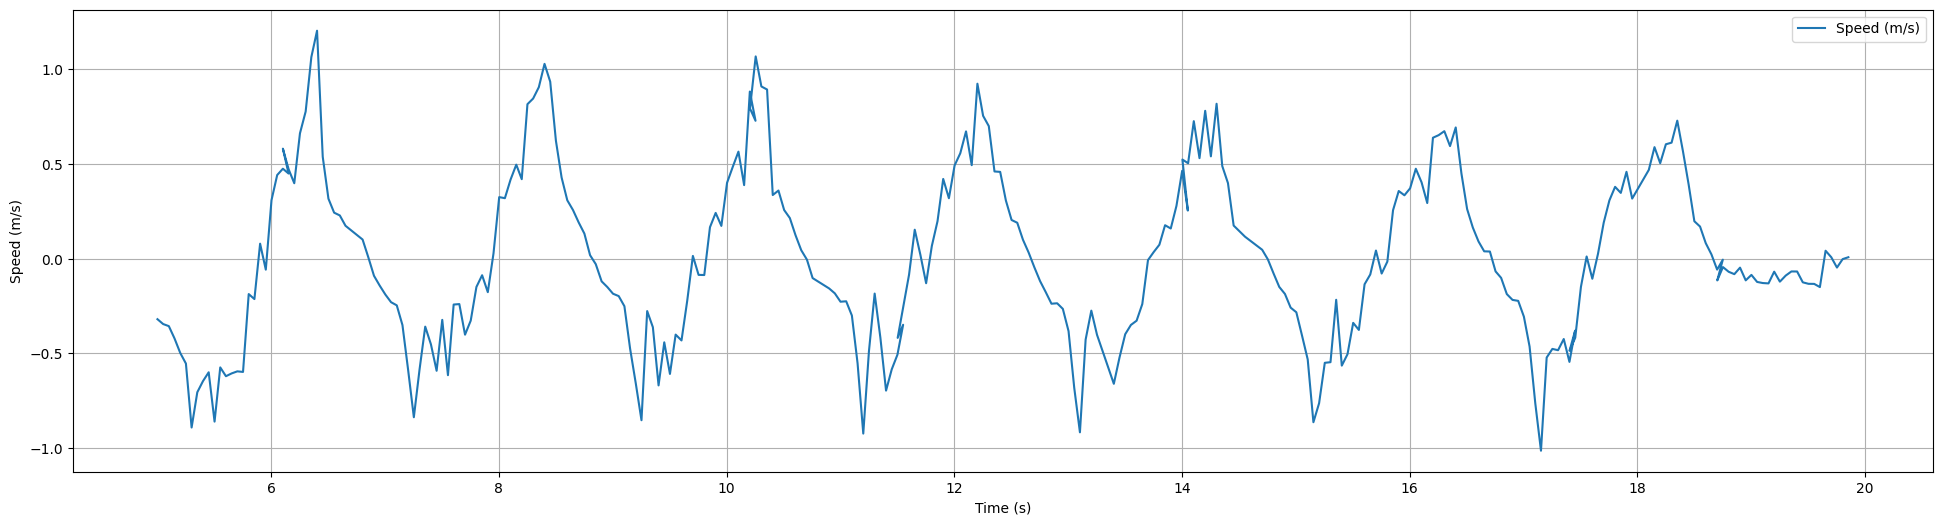

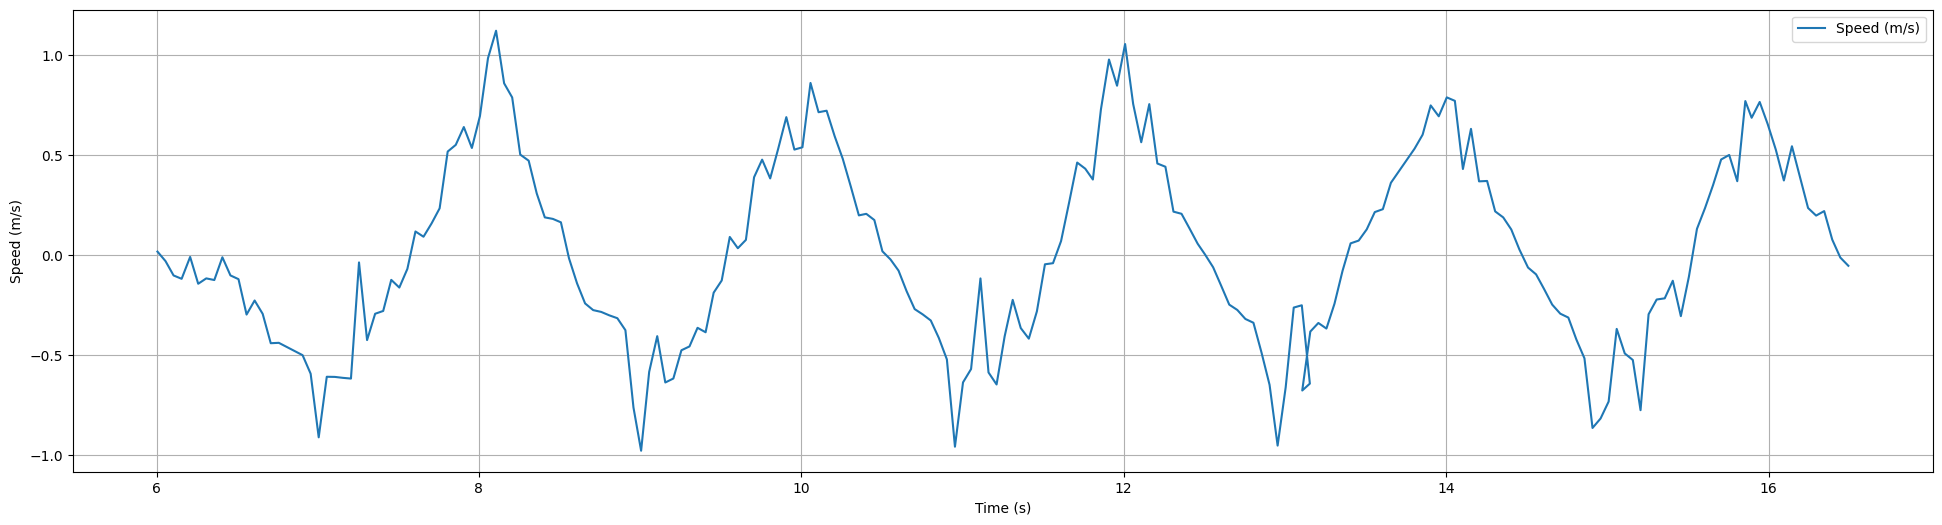

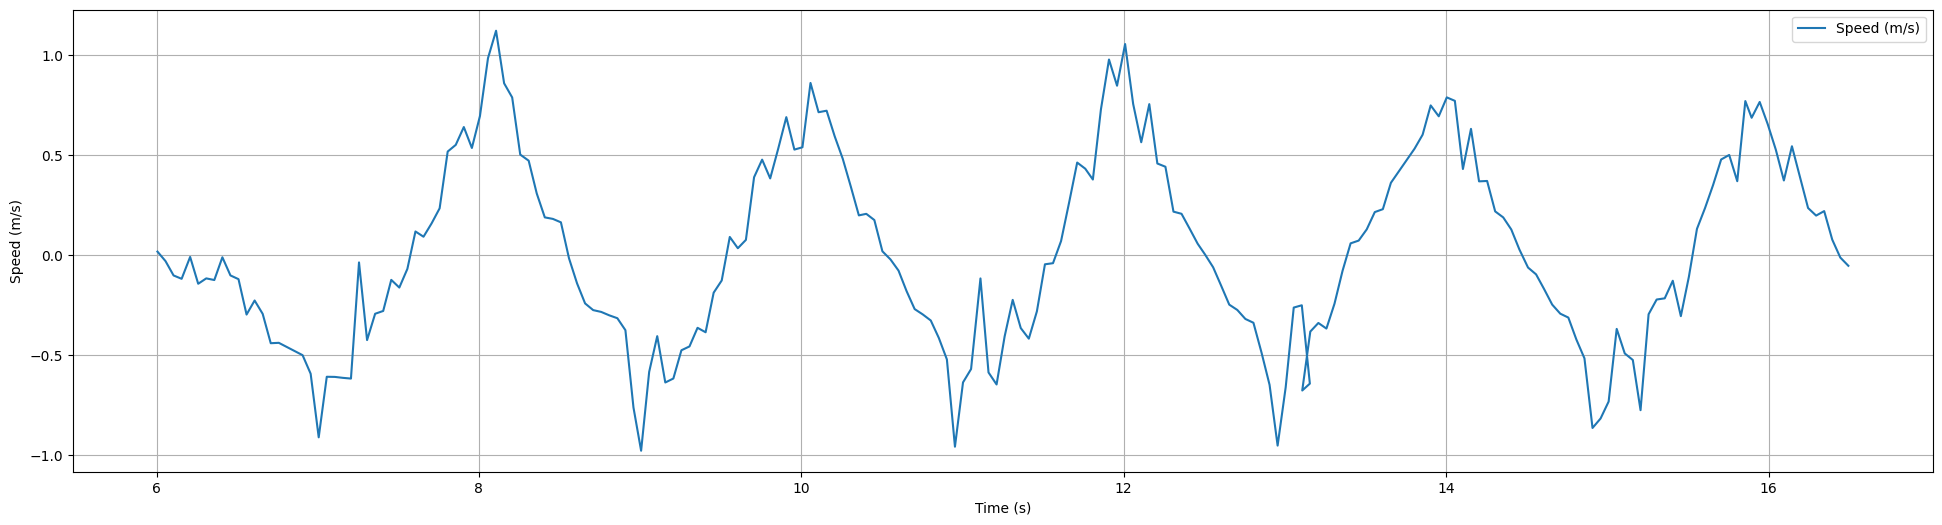

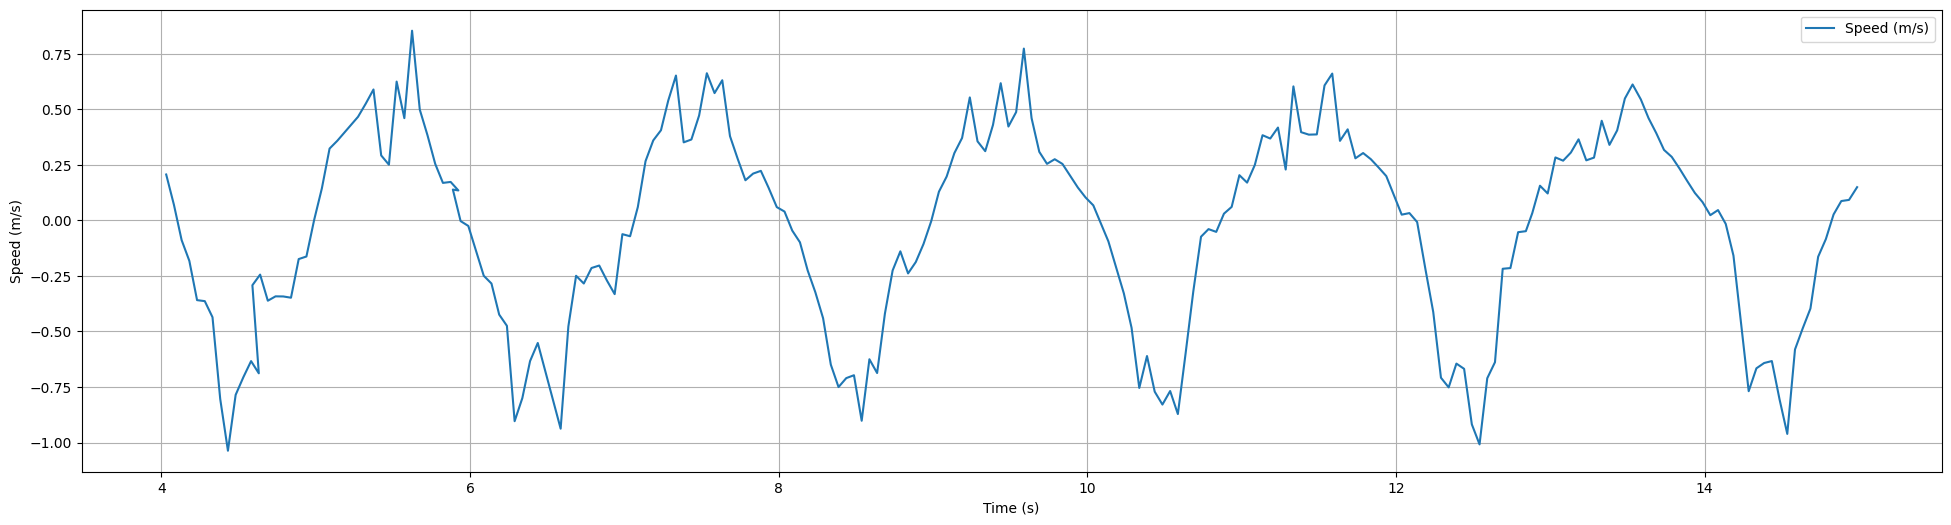

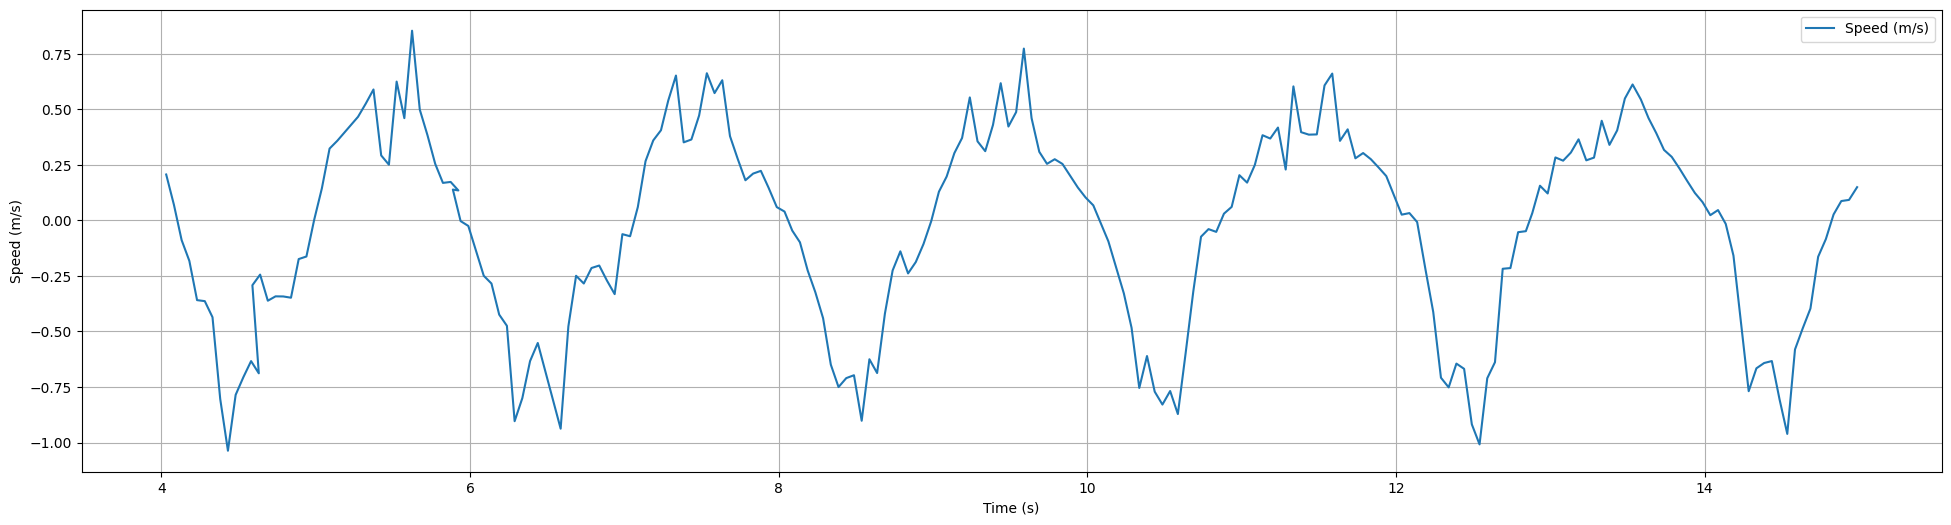

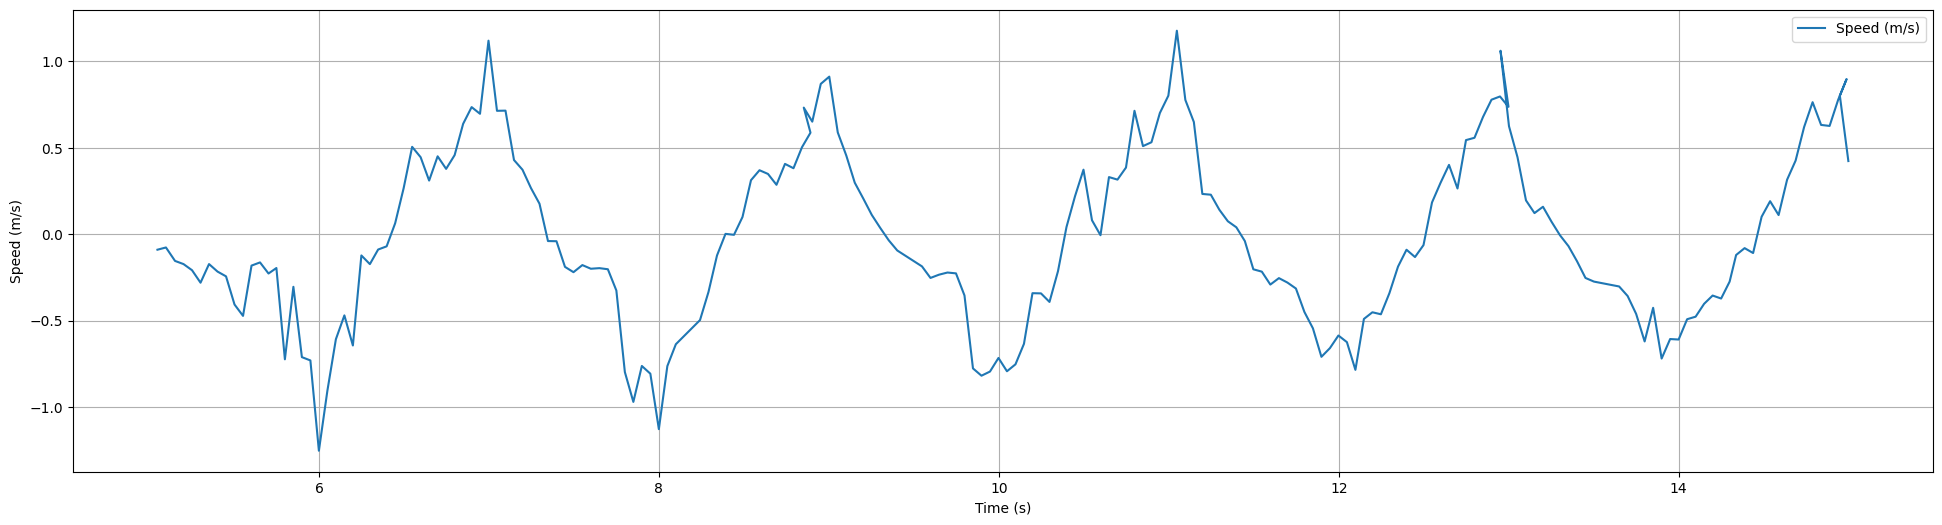

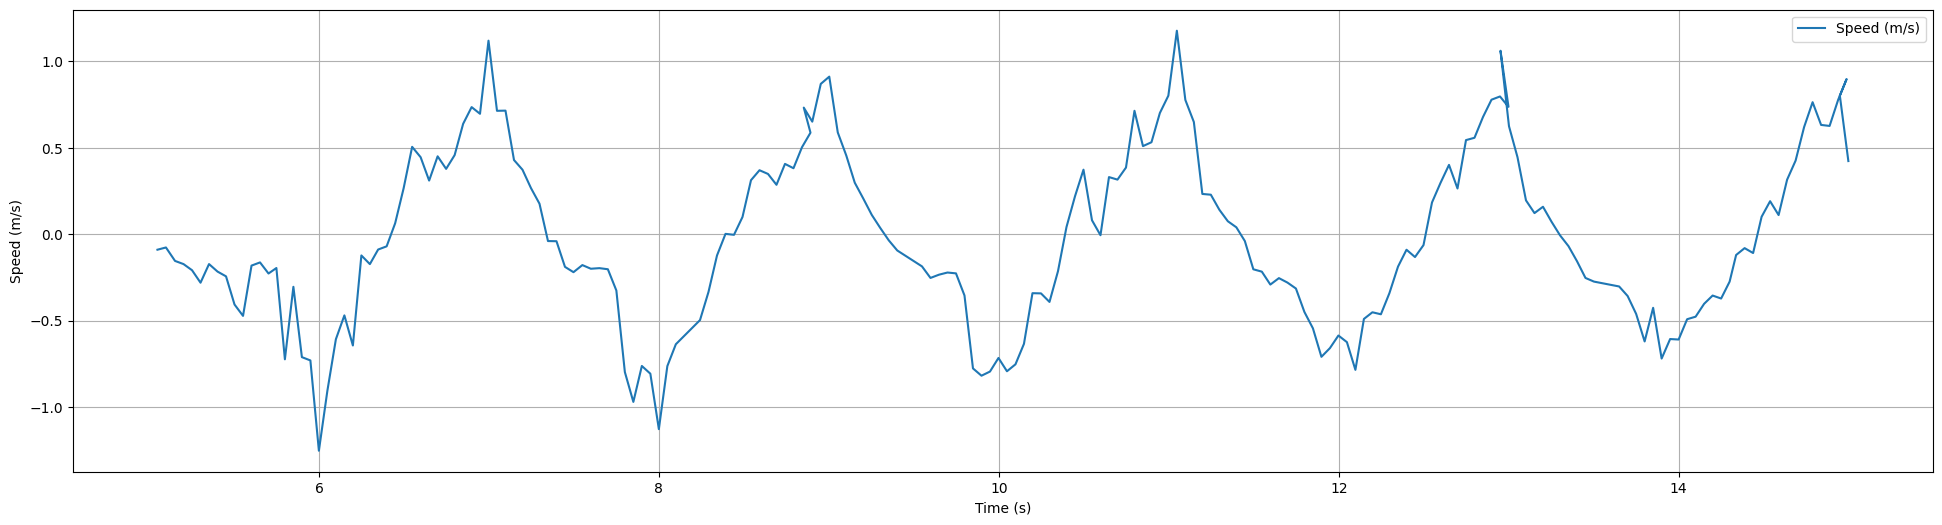

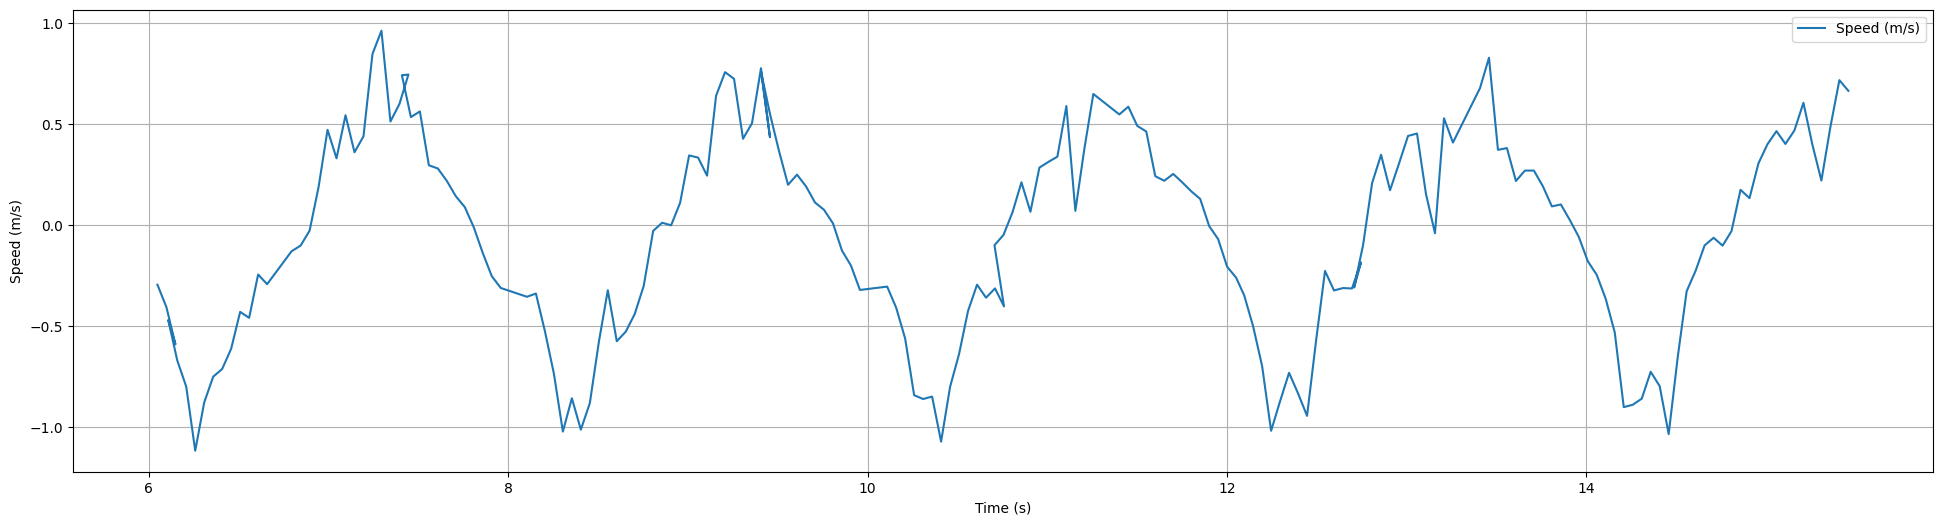

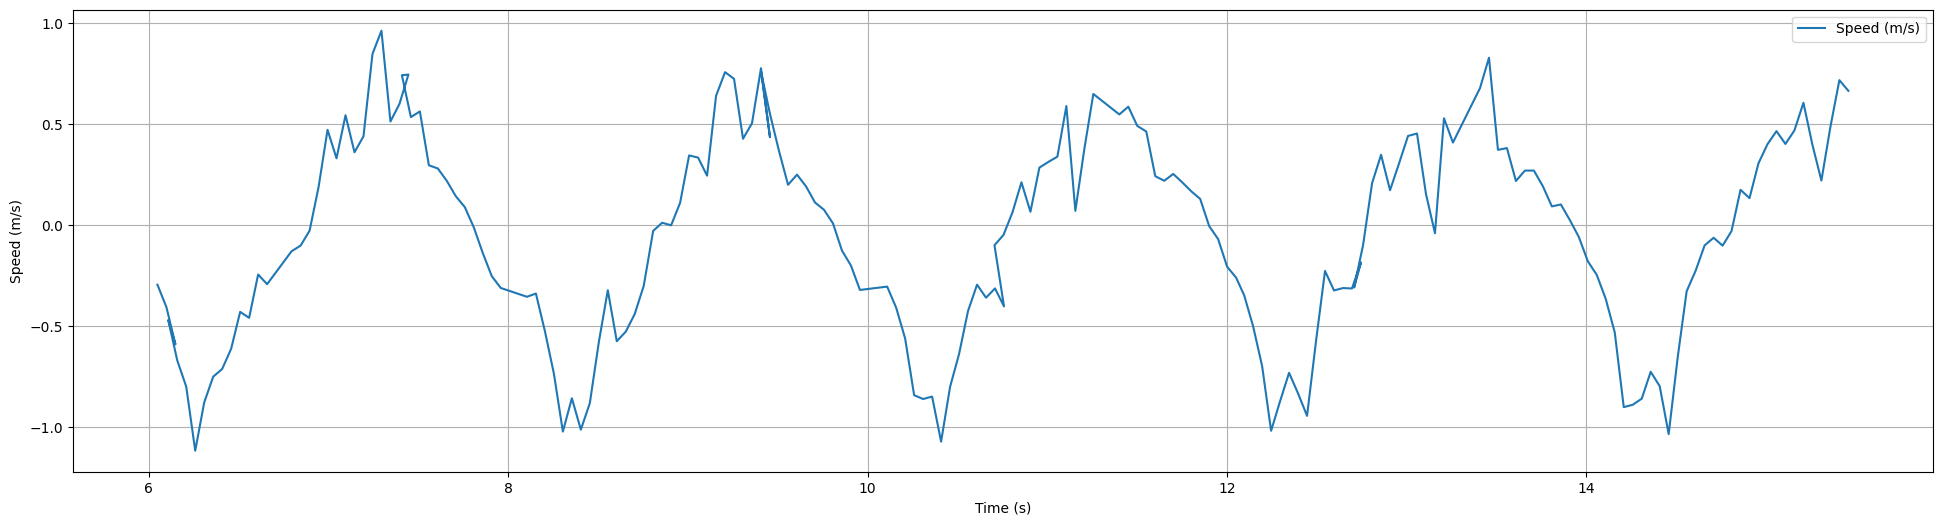

In [13]:
# tdf = FIFTEEN_DEG_SAMPLES['15-t1']
# wf = WaveFilter(x_min=0, x_max=99999)

fifteen_avglist = []
for tdf_key in FIFTEEN_DEG_SAMPLES.keys():
    print(tdf_key)
    tdf = FIFTEEN_DEG_SAMPLES[tdf_key]
    try:
        wf = WFS[tdf_key]
    except KeyError:
        wf = None
    crestslist = get_crests(tdf, wave_filter=wf)
    troughslist = get_crests(tdf, wave_filter=wf, use_troughs=True)

    print(crestslist)
    print(troughslist)
    tdf_crests = filter_points(crestslist)
    tdf_troughs = filter_points(troughslist)

    tdf_crests.extend(tdf_troughs)

    tdf_avg_v = np.average(tdf_crests)
    fifteen_avglist.append(tdf_avg_v)
    print("trial avg v:", tdf_avg_v)
    print("~~~~~~")

print("15deg avg v:", np.average(fifteen_avglist))
print("15deg trial stdev:", np.std(fifteen_avglist))

## 30

In [14]:
THIRTY_DEG_SAMPLES = {}

for trial in range(1, 11):
    trial_id = f"30-t{trial}"
    xls_name = f"{trial_id}.xls"
    df = pd.read_excel(xls_name)
    THIRTY_DEG_SAMPLES[trial_id] = df

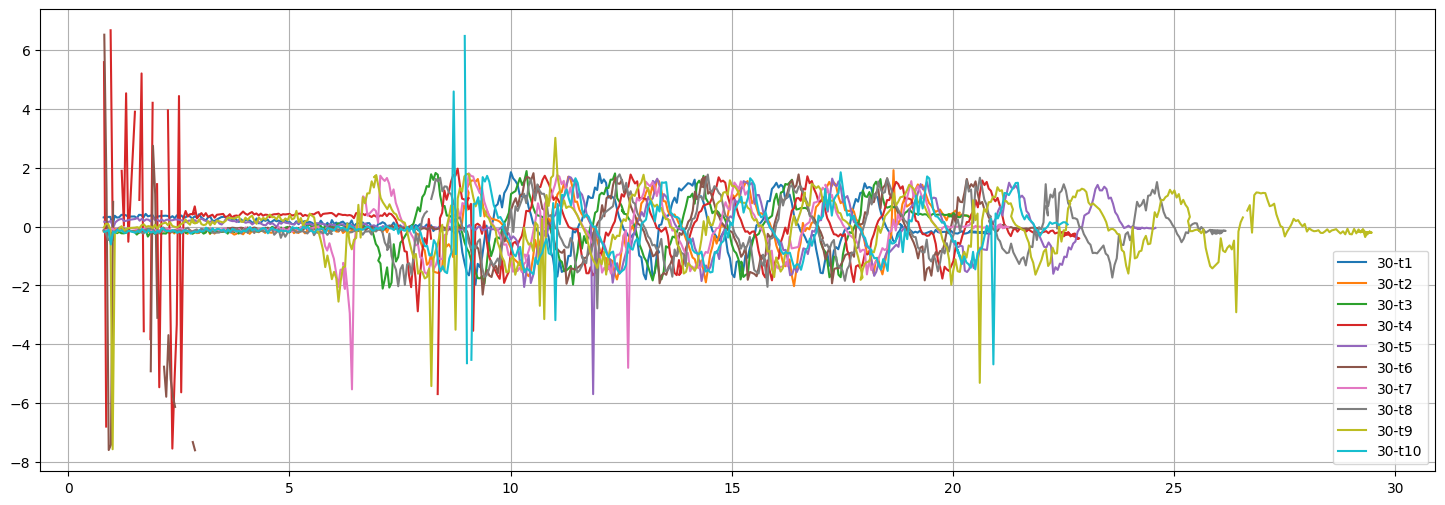

In [15]:
big_scary_plot(THIRTY_DEG_SAMPLES)

## 45

In [16]:
FORTYFIVE_DEG_SAMPLES = {}

for trial in range(1, 11):
    trial_id = f"45-t{trial}"
    xls_name = f"{trial_id}.xls"
    df = pd.read_excel(xls_name)
    FORTYFIVE_DEG_SAMPLES[trial_id] = df

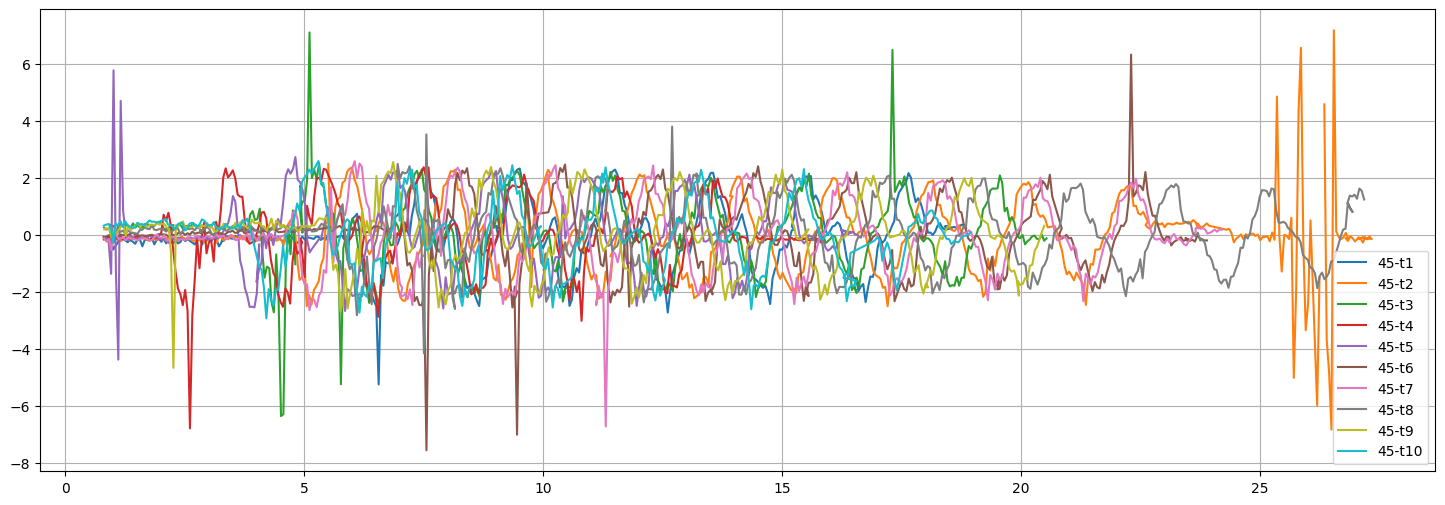

In [17]:
big_scary_plot(FORTYFIVE_DEG_SAMPLES)

## 60

In [18]:
# SIXTY_DEG_SAMPLES = {}

# for trial in range(1, 11):
#     trial_id = f"60-t{trial}"
#     xls_name = f"{trial_id}.xls"
#     df = pd.read_excel(xls_name)
#     SIXTY_DEG_SAMPLES[trial_id] = df

Unfortunately, the $60^o$ angle proved too difficult to collect data for as the large angle caused some problems in our setup.

## Objective
- 4 angles, 10 samples for each = 40 total
- For each sample, find 5 highest crests + 5 lowest troughs
- absolute value all points
- avg all points